<a href="https://colab.research.google.com/github/alfinasalsaa/PCVK/blob/main/Kuis2_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 1 :**


# **1.   Alfina Salsabilla 2141720044**
# **2.   M. Rafi Prabowo 2141720239**
# **3. Syaikhul Syafwan R 2141720105**






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Import File**

In [3]:
def pathProcessing (path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif']  # Add more extensions if needed
    image_paths = []

    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(path, ext)))

    return image_paths

In [4]:
def readImage (paths):
    images=[]

    for path in paths:
        image= cv2.imread(path,0)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image at path: {path}")

    return images

In [5]:
def show_images(images, num_cols=3):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 8))  # Atur ukuran figur sesuai kebutuhan

    for i, image in enumerate(images, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image, cmap='gray')  # Menggunakan cmap='gray' jika gambar dalam mode grayscale
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# **Pre Procesing**

In [6]:
def gaussianBlur(images):
    blurredImages=[]
    for image in images:
        kernel_size = (5, 5)
        sigma_x = 0
        blurredImage = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurredImages.append(blurredImage)

    return blurredImages

In [7]:
def histogramEqualizing(images):
    equalizedImages=[]
    for image in images:
        equalizedImage = cv2.equalizeHist(image)
        equalizedImages.append(equalizedImage)

    return equalizedImages

In [8]:
def contourDetect(images):
    cleanImages=[]
    for image in images:
        _, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Choose the contour with the largest area
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask to extract the necessary part
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

        result = cv2.bitwise_and(image, image, mask=mask)

        cleanImages.append(result)

    return cleanImages

In [9]:
def erode(images):

    erodedImages=[]
    for image in images:
        kernel = (5, 5)
        erodedImage  = cv2.erode(image, kernel, iterations=1)
        erodedImages.append(erodedImage)

    return erodedImages

In [10]:
def adaptiveThresholding(images):
    thresholded=[]
    for image in images:
        normalizedImage = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        adaptiveThreshold = cv2.adaptiveThreshold(normalizedImage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        thresholded.append(adaptiveThreshold)
    return thresholded

In [11]:
def laplacianEdgeDetect(images):
    edgeDetected=[]
    for image in images :
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        edgeDetected.append(laplacian)

    return edgeDetected

In [12]:
def sobelEdgeDetect(images):
    edgeDetected=[]
    for image in images :
        normalizedImage = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        sobel_x = cv2.Sobel(normalizedImage, cv2.CV_64F, 1, 0, ksize=5)
        sobel_y = cv2.Sobel(normalizedImage, cv2.CV_64F, 0, 1, ksize=5)
        sobelCombined = cv2.magnitude(sobel_x, sobel_y)
        edgeDetected.append(sobelCombined)
    return sobelCombined

In [13]:
def otsuThresholding(images):
    thresholded=[]
    for image in images:
        normalizedImage = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        ret, otsu_threshold = cv2.threshold(normalizedImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresholded.append(otsu_threshold)
    return thresholded

In [14]:
def bitwiseNot(images):
    flippedImage=[]
    for image in images :
        bitwise_not_image = cv2.bitwise_not(image)
        flippedImage.append(bitwise_not_image)
    return flippedImage

In [15]:
def contour(images, templates, originalImages, threshold=0.8):
    matched_regions = []
    count = 0
    for image in images:
        found = False
        for template in templates:
            if not found:
                h, w = template.shape[:2]
                if h > image.shape[0] or w > image.shape[1]:
                    template = cv2.resize(template, (image.shape[1], image.shape[0]))

                result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
                if max_val >= threshold:
                    found = True
                    top_left = max_loc
                    bottom_right = (top_left[0] + w, top_left[1] + h)

                    # Membuat salinan kosong dari gambar
                    matched_region = np.zeros_like(originalImages[count])

                    # Menambahkan kotak hitam di area di mana template cocok
                    cv2.rectangle(matched_region, top_left, bottom_right, (225, 225, 225), 4)
                    matched_regions.append(matched_region)
                    break  # Hentikan pencarian template setelah yang pertama ditemukan
        count += 1

    return matched_regions

In [16]:
def matchFeature(images, templates,originalImages, threshold=0.8):
    matched_regions = []
    count=0
    for image in images:
        found = False
        for template in templates:
            if not found:
                h, w = template.shape[:2]
                if h > image.shape[0] or w > image.shape[1]:
                    template = cv2.resize(template, (image.shape[1], image.shape[0]))

                result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
                if max_val >= threshold:
                    found = True
                    top_left = max_loc
                    bottom_right = (top_left[0] + w, top_left[1] + h)
                    matched_regions.append(originalImages[count][top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]])
                    # Menyimpan potongan gambar yang sesuai dengan template yang ditemukan
                    break  # Hentikan pencarian template setelah yang pertama ditemukan
        count+=1

    return matched_regions

In [17]:
def faceDet(images):
    faces = []
    for image in images:

        mukaTamvan = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_frontalface_alt.xml')
        roi_wajah = mukaTamvan.detectMultiScale(image)

        for (x, y, w, h) in roi_wajah:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # Garis putih pada wajah

        faces.append(image)
    return faces

In [18]:
def show_multiple_images(images_list, titles_list):
    num_cols = len(images_list)
    num_rows = max(len(images) for images in images_list)

    plt.figure(figsize=(10, 8))  # Sesuaikan ukuran figur sesuai kebutuhan

    for i in range(num_rows):
        for j in range(num_cols):
            if i < len(images_list[j]):
                plt.subplot(num_rows, num_cols, i * num_cols + j + 1)
                plt.imshow(images_list[j][i], cmap='gray' if j == 1 else None)  # cmap='gray' untuk tresholded
                plt.title(titles_list[j])
                plt.axis('off')

    plt.tight_layout()
    plt.show()

In [27]:
def main ():
    folderPath= '/content/drive/MyDrive/PCVK/Kuis 2/KTP'
    folderMuka= '/content/drive/MyDrive/PCVK/Kuis 2/muka'

    featuresPath=pathProcessing(folderMuka)

    paths=pathProcessing(folderPath)
    features=readImage(featuresPath)

    KTP= readImage(paths)
    KTP1= readImage(paths)
    KTP2= readImage(paths)
    KTP4= readImage(paths)


    thresholded= otsuThresholding(erode(KTP))

    kontour=contour(otsuThresholding(erode(KTP1)),features,KTP1)

    matched=matchFeature(otsuThresholding(erode(KTP2)),features,KTP2)

    faces_detected = faceDet(matchFeature(otsuThresholding(erode(KTP)),features,KTP))

    return {
        'images': KTP,
        'thresholded': thresholded,
        'contour': kontour,
        'matched': matched,
        'faces_detected': faces_detected
        }

In [28]:
result=main()

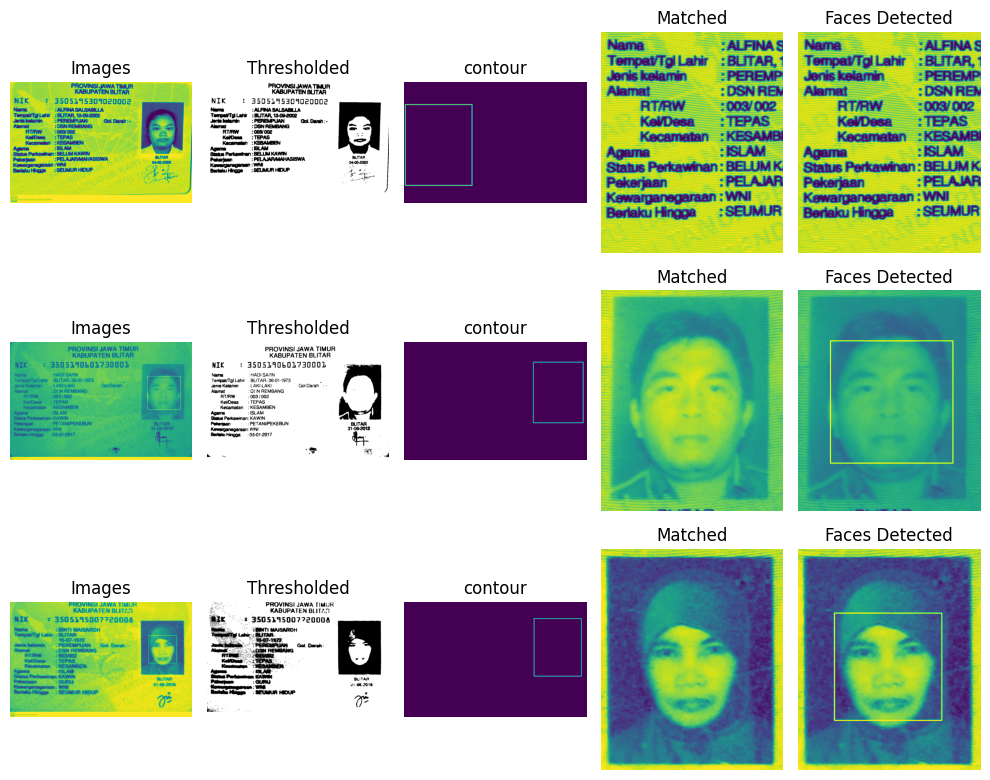

In [29]:
images_list = [result['images'], result['thresholded'],result['contour'], result['matched'], result['faces_detected']]
titles_list = ['Images', 'Thresholded','contour', 'Matched', 'Faces Detected']

show_multiple_images(images_list, titles_list)